### 0. Initiliazation of variables

In [172]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all, var

### 1. Import modules

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
import sys, os, time, datetime
import importlib # library(모듈) import와 관련된 설정 작업해주는 모듈
import module_opt_for_plot
from module_opt_for_plot import *
importlib.reload(module_opt_for_plot) # 항상 최신 버전의 module만 import해준다.(조취 취하는 이유 : 가끔 오래된 캐시에서 모듈을 읽어올 때가 있어서 그럼.)

<module 'module_opt_for_plot' from '/home/chiyoung0/NumericalOptimization_25/Assignment_2/module_opt_for_plot.py'>

### 2. Functions to optimize
#### Target function  
$f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $ ... Rosenbrock function  
$\frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2)$  
$\frac{\partial f}{\partial y} = 200(y - x^2)$

In [174]:
# Target function
func_rosenbrock = lambda x : (1.0 - x[0])**2 + 100*(x[1] - x[0]**2)**2
Dfunc_rosenbrock = lambda x : np.array([-2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
                                        200*(x[1] - x[0]**2)]).reshape(-1, 1)

### 3. Plot above functions

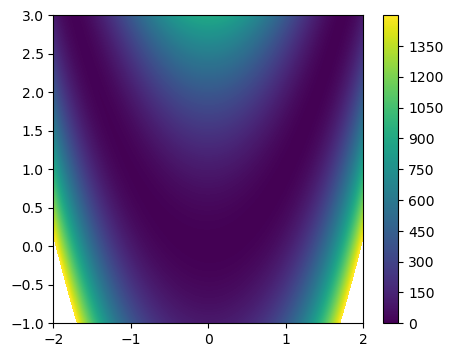

In [175]:
# Rosenbrock function
step = .01
grid_rosenbrock = np.meshgrid(np.arange(-2, 2+step, step), np.arange(-1, 3+step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)
fig_rosenbrock, ax_rosenbrock = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=range(1500))
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

In [176]:
#################################### Define optimization problem  ####################################
obj = func_rosenbrock

#################################### Tolerance setting ####################################
tol = 1e-2

#################################### Initial guess ####################################
x_cur = np.array([0, 3]) # 2 x 1 matrix(※ matlab과 다른 점. numpyp는 vector를 1차원 array, matrix를 2차원 array로 엄밀하게 구분해서 다룬다.)
                      # 웬만하면 vector는 1차원 array로, matrix는 2차원 array로 쓰는 걸 추천. GPT가 수치적으로는 그게 안정적이라고 추천함.

list_x_stp, list_f_stp, list_grad_stp = stp_descent(obj, x_cur, tol)
list_x_cghs, list_f_cghs, list_grad_cghs = cg_hs(obj, x_cur, tol)
list_x_cgfr, list_f_cgfr, list_grad_cgfr = cg_fr(obj, x_cur, tol)
list_x_newton, list_f_newton, list_grad_newton = newton(obj, x_cur, tol)
list_x_bfgs, list_f_bfgs, list_grad_bfgs = quasi_newton_bfgs(obj, x_cur, tol)

list_x_stp = np.array(list_x_stp)
list_x_cghs = np.array(list_x_cghs)
list_x_cgfr = np.array(list_x_cgfr)
list_x_newton = np.array(list_x_newton)
list_x_bfgs = np.array(list_x_bfgs)

Since |grad(x0)| = 600.0033333060798 > 0.01, x0 : [0 3] is not an optimum point. Optimization begins !
x_1 : [ 0.01850696 -2.55208661]
f_1 : 652.4527666165145
norm(grad(x_1)) : 510.76655221772086
recent alpha : 0.00925347767736579
recent p : [   1.99999999 -599.99999998]

x_2 : [-0.13875677  2.18925952]
f_2 : 472.1894051543702
norm(grad(x_2)) : 449.79963898673634
recent alpha : 0.009287909507479371
recent p : [-16.93209055 510.4858227 ]

x_3 : [-0.8365016  -0.37347426]
f_3 : 118.55053389359463
norm(grad(x_3)) : 421.5125345066287
recent alpha : 0.005904900000000001
recent p : [-118.16369977 -434.00121577]

x_4 : [1.30561593 0.89396433]
f_4 : 65.81176200761234
norm(grad(x_4)) : 453.923301614822
recent alpha : 0.005904900000000001
recent p : [362.76948389 214.64183726]

x_5 : [-1.47611669  1.95772369]
f_5 : 11.023956392825209
norm(grad(x_5)) : 142.5933446343146
recent alpha : 0.006561000000000001
recent p : [-423.97997522  162.13372371]

x_6 : [-1.34262396  2.00128932]
f_6 : 9.43407864684

In [177]:
list_grad_stp_ndarray = np.array(list_grad_stp)
list_grad_stp_ndarray
list_grad_stp_norm = (list_grad_stp_ndarray[:, 0]**2 + list_grad_stp_ndarray[:, 1]**2)**.5

In [178]:
list_grad_cghs_ndarray = np.array(list_grad_cghs)
list_grad_cghs_ndarray
list_grad_cghs_norm = (list_grad_cghs_ndarray[:, 0]**2 + list_grad_cghs_ndarray[:, 1]**2)**.5

In [179]:
list_grad_cgfr_ndarray = np.array(list_grad_cgfr)
list_grad_cgfr_ndarray
list_grad_cgfr_norm = (list_grad_cgfr_ndarray[:, 0]**2 + list_grad_cgfr_ndarray[:, 1]**2)**.5

In [180]:
list_grad_newton_ndarray = np.array(list_grad_newton)
list_grad_newton_ndarray
list_grad_newton_norm = (list_grad_newton_ndarray[:, 0]**2 + list_grad_newton_ndarray[:, 1]**2)**.5

In [181]:
list_grad_bfgs_ndarray = np.array(list_grad_bfgs)
list_grad_bfgs_ndarray
list_grad_bfgs_norm = (list_grad_bfgs_ndarray[:, 0]**2 + list_grad_bfgs_ndarray[:, 1]**2)**.5

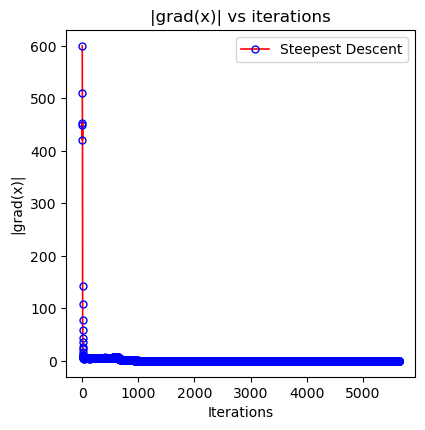

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.plot(
    range(len(list_grad_stp_norm)),
    list_grad_stp_norm,
    color='red',                # 선 색상
    marker='o',                 # 원형 마커
    markerfacecolor='none',     # 속이 빈 마커
    markeredgecolor='blue',     # 마커 테두리 색상
    markersize=5,               # 마커 크기 (적당히)
    linewidth=1.2,               # 선 두께 (원하면 조절)
    label='Steepest Descent' # 레전드
)
ax.set_title('|grad(x)| vs iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('|grad(x)|')
ax.legend(loc='best')           # ✅ 레전드 표시 (자동 최적 위치)

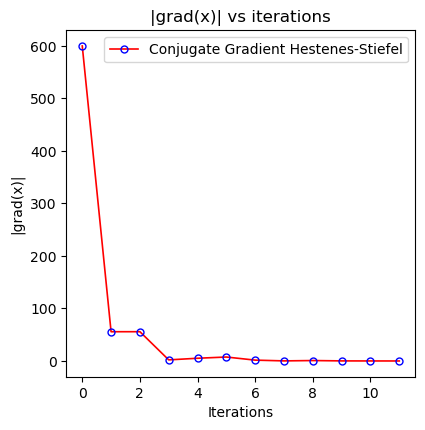

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.plot(
    range(len(list_grad_cghs_norm)),
    list_grad_cghs_norm,
    color='red',                # 선 색상
    marker='o',                 # 원형 마커
    markerfacecolor='none',     # 속이 빈 마커
    markeredgecolor='blue',     # 마커 테두리 색상
    markersize=5,               # 마커 크기 (적당히)
    linewidth=1.2,               # 선 두께 (원하면 조절)
    label='Conjugate Gradient Hestenes-Stiefel' # 레전드
)
ax.set_title('|grad(x)| vs iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('|grad(x)|')
ax.legend(loc='best')           # ✅ 레전드 표시 (자동 최적 위치)

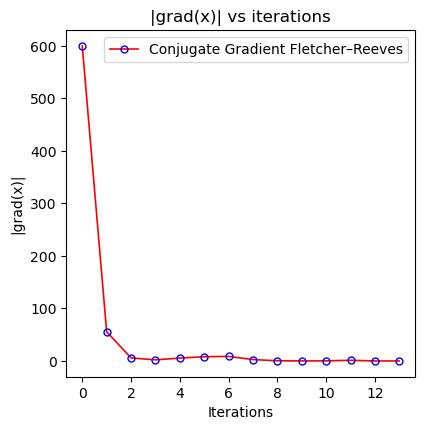

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.plot(
    range(len(list_grad_cgfr_norm)),
    list_grad_cgfr_norm,
    color='red',                # 선 색상
    marker='o',                 # 원형 마커
    markerfacecolor='none',     # 속이 빈 마커
    markeredgecolor='blue',     # 마커 테두리 색상
    markersize=5,               # 마커 크기 (적당히)
    linewidth=1.2,               # 선 두께 (원하면 조절)
    label='Conjugate Gradient Fletcher–Reeves' # 레전드
)
ax.set_title('|grad(x)| vs iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('|grad(x)|')
ax.legend(loc='best')           # ✅ 레전드 표시 (자동 최적 위치)

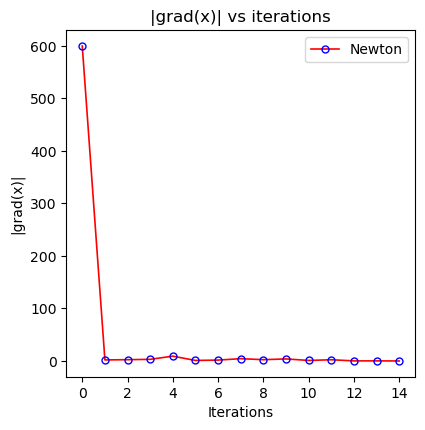

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.plot(
    range(len(list_grad_newton_norm)),
    list_grad_newton_norm,
    color='red',                # 선 색상
    marker='o',                 # 원형 마커
    markerfacecolor='none',     # 속이 빈 마커
    markeredgecolor='blue',     # 마커 테두리 색상
    markersize=5,               # 마커 크기 (적당히)
    linewidth=1.2,               # 선 두께 (원하면 조절)
    label='Newton' # 레전드
)
ax.set_title('|grad(x)| vs iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('|grad(x)|')
ax.legend(loc='best')           # ✅ 레전드 표시 (자동 최적 위치)

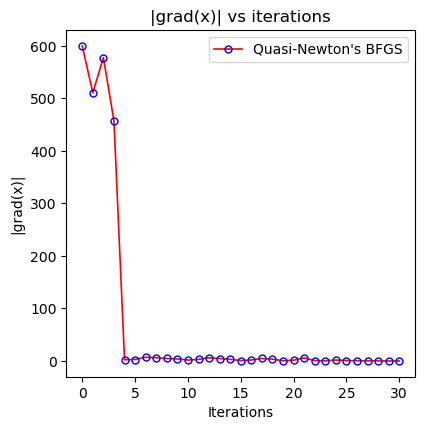

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.plot(
    range(len(list_grad_bfgs_norm)),
    list_grad_bfgs_norm,
    color='red',                # 선 색상
    marker='o',                 # 원형 마커
    markerfacecolor='none',     # 속이 빈 마커
    markeredgecolor='blue',     # 마커 테두리 색상
    markersize=5,               # 마커 크기 (적당히)
    linewidth=1.2,               # 선 두께 (원하면 조절)
    label='Quasi-Newton\'s BFGS' # 레전드
)
ax.set_title('|grad(x)| vs iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('|grad(x)|')
ax.legend(loc='best')           # ✅ 레전드 표시 (자동 최적 위치)

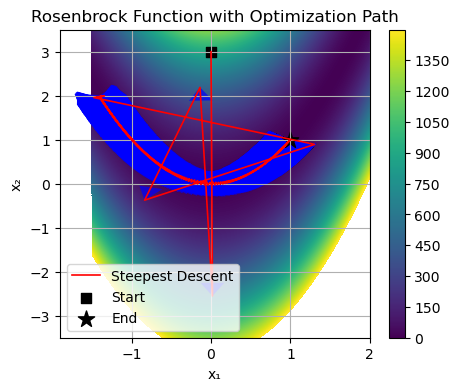

In [192]:
# Rosenbrock function contour
step = 0.01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 2 + step, step),
                              np.arange(-3.5, 3.5 + step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)

fig_rosenbrock, ax_rosenbrock = plt.subplots(figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(
    grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=range(1500)
)
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

# ✅ list_x_stp trajectory
ax_rosenbrock.plot(
    list_x_stp[:, 0], list_x_stp[:, 1],
    color='red',
    linewidth=1.2,
    label='Steepest Descent'
)

# ✅ 각 구간에 화살표 추가
for i in range(len(list_x_stp) - 1):
    ax_rosenbrock.arrow(
        list_x_stp[i, 0], list_x_stp[i, 1],                     # 시작점
        list_x_stp[i+1, 0] - list_x_stp[i, 0],                 # Δx
        list_x_stp[i+1, 1] - list_x_stp[i, 1],                 # Δy
        shape='full',                            # 꽉 찬 화살촉
        lw=0,                                    # 선 두께 (plot로 이미 그림)
        length_includes_head=True,
        head_width=0.3, head_length=0.3,       # 화살표 크기
        color='blue', alpha=0.7
    )

# ✅ 출발점 / 도착점 강조
ax_rosenbrock.scatter(list_x_stp[0, 0], list_x_stp[0, 1], color='black', marker='s', s=50, label='Start')
ax_rosenbrock.scatter(list_x_stp[-1, 0], list_x_stp[-1, 1], color='black', marker='*', s=150, label='End')

ax_rosenbrock.legend(loc='best')
ax_rosenbrock.set_title("Rosenbrock Function with Optimization Path")
ax_rosenbrock.set_xlabel("x₁")
ax_rosenbrock.set_ylabel("x₂")

ax_rosenbrock.grid(axis='both')

plt.show()

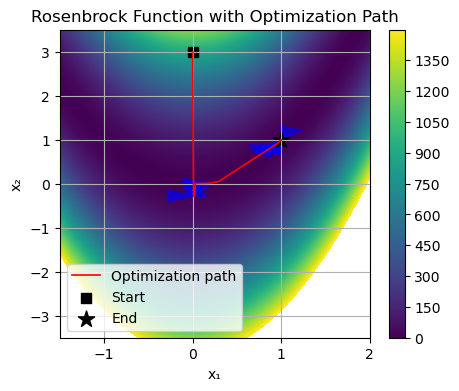

In [188]:
# Rosenbrock function contour
step = 0.01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 2 + step, step),
                              np.arange(-3.5, 3.5 + step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)

fig_rosenbrock, ax_rosenbrock = plt.subplots(figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(
    grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=range(1500)
)
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

# ✅ list_x_cghs trajectory
ax_rosenbrock.plot(
    list_x_cghs[:, 0], list_x_cghs[:, 1],
    color='red',
    linewidth=1.2,
    label='Optimization path'
)

# ✅ 각 구간에 화살표 추가
for i in range(len(list_x_cghs) - 1):
    ax_rosenbrock.arrow(
        list_x_cghs[i, 0], list_x_cghs[i, 1],                     # 시작점
        list_x_cghs[i+1, 0] - list_x_cghs[i, 0],                 # Δx
        list_x_cghs[i+1, 1] - list_x_cghs[i, 1],                 # Δy
        shape='full',                            # 꽉 찬 화살촉
        lw=0,                                    # 선 두께 (plot로 이미 그림)
        length_includes_head=True,
        head_width=0.3, head_length=0.3,       # 화살표 크기
        color='blue', alpha=0.7
    )

# ✅ 출발점 / 도착점 강조
ax_rosenbrock.scatter(list_x_cghs[0, 0], list_x_cghs[0, 1], color='black', marker='s', s=50, label='Start')
ax_rosenbrock.scatter(list_x_cghs[-1, 0], list_x_cghs[-1, 1], color='black', marker='*', s=150, label='End')

ax_rosenbrock.legend(loc='best')
ax_rosenbrock.set_title("Rosenbrock Function with Optimization Path")
ax_rosenbrock.set_xlabel("x₁")
ax_rosenbrock.set_ylabel("x₂")

ax_rosenbrock.grid(axis='both')

plt.show()

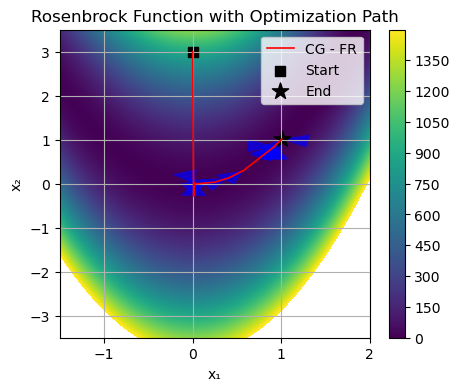

In [193]:
# Rosenbrock function contour
step = 0.01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 2 + step, step),
                              np.arange(-3.5, 3.5 + step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)

fig_rosenbrock, ax_rosenbrock = plt.subplots(figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(
    grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=range(1500)
)
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

# ✅ list_x_cgfr trajectory
ax_rosenbrock.plot(
    list_x_cgfr[:, 0], list_x_cgfr[:, 1],
    color='red',
    linewidth=1.2,
    label='CG - FR'
)

# ✅ 각 구간에 화살표 추가
for i in range(len(list_x_cgfr) - 1):
    ax_rosenbrock.arrow(
        list_x_cgfr[i, 0], list_x_cgfr[i, 1],                     # 시작점
        list_x_cgfr[i+1, 0] - list_x_cgfr[i, 0],                 # Δx
        list_x_cgfr[i+1, 1] - list_x_cgfr[i, 1],                 # Δy
        shape='full',                            # 꽉 찬 화살촉
        lw=0,                                    # 선 두께 (plot로 이미 그림)
        length_includes_head=True,
        head_width=0.3, head_length=0.3,       # 화살표 크기
        color='blue', alpha=0.7
    )

# ✅ 출발점 / 도착점 강조
ax_rosenbrock.scatter(list_x_cgfr[0, 0], list_x_cgfr[0, 1], color='black', marker='s', s=50, label='Start')
ax_rosenbrock.scatter(list_x_cgfr[-1, 0], list_x_cgfr[-1, 1], color='black', marker='*', s=150, label='End')

ax_rosenbrock.legend(loc='best')
ax_rosenbrock.set_title("Rosenbrock Function with Optimization Path")
ax_rosenbrock.set_xlabel("x₁")
ax_rosenbrock.set_ylabel("x₂")

ax_rosenbrock.grid(axis='both')

plt.show()

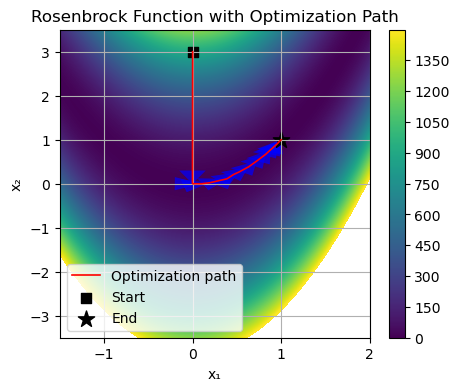

In [190]:
# Rosenbrock function contour
step = 0.01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 2 + step, step),
                              np.arange(-3.5, 3.5 + step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)

fig_rosenbrock, ax_rosenbrock = plt.subplots(figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(
    grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=range(1500)
)
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

# ✅ list_x_newton trajectory
ax_rosenbrock.plot(
    list_x_newton[:, 0], list_x_newton[:, 1],
    color='red',
    linewidth=1.2,
    label='Optimization path'
)

# ✅ 각 구간에 화살표 추가
for i in range(len(list_x_newton) - 1):
    ax_rosenbrock.arrow(
        list_x_newton[i, 0], list_x_newton[i, 1],                     # 시작점
        list_x_newton[i+1, 0] - list_x_newton[i, 0],                 # Δx
        list_x_newton[i+1, 1] - list_x_newton[i, 1],                 # Δy
        shape='full',                            # 꽉 찬 화살촉
        lw=0,                                    # 선 두께 (plot로 이미 그림)
        length_includes_head=True,
        head_width=0.3, head_length=0.3,       # 화살표 크기
        color='blue', alpha=0.7
    )

# ✅ 출발점 / 도착점 강조
ax_rosenbrock.scatter(list_x_newton[0, 0], list_x_newton[0, 1], color='black', marker='s', s=50, label='Start')
ax_rosenbrock.scatter(list_x_newton[-1, 0], list_x_newton[-1, 1], color='black', marker='*', s=150, label='End')

ax_rosenbrock.legend(loc='best')
ax_rosenbrock.set_title("Rosenbrock Function with Optimization Path")
ax_rosenbrock.set_xlabel("x₁")
ax_rosenbrock.set_ylabel("x₂")

ax_rosenbrock.grid(axis='both')

plt.show()

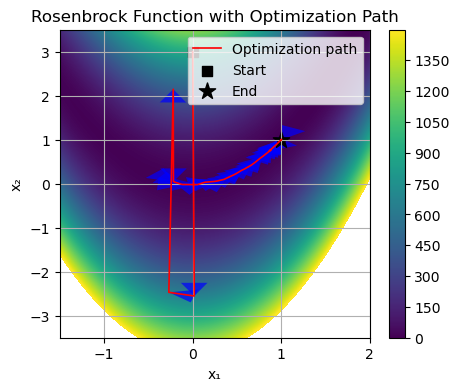

In [191]:
# Rosenbrock function contour
step = 0.01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 2 + step, step),
                              np.arange(-3.5, 3.5 + step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)

fig_rosenbrock, ax_rosenbrock = plt.subplots(figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(
    grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=range(1500)
)
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

# ✅ list_x_bfgs trajectory
ax_rosenbrock.plot(
    list_x_bfgs[:, 0], list_x_bfgs[:, 1],
    color='red',
    linewidth=1.2,
    label='Optimization path'
)

# ✅ 각 구간에 화살표 추가
for i in range(len(list_x_bfgs) - 1):
    ax_rosenbrock.arrow(
        list_x_bfgs[i, 0], list_x_bfgs[i, 1],                     # 시작점
        list_x_bfgs[i+1, 0] - list_x_bfgs[i, 0],                 # Δx
        list_x_bfgs[i+1, 1] - list_x_bfgs[i, 1],                 # Δy
        shape='full',                            # 꽉 찬 화살촉
        lw=0,                                    # 선 두께 (plot로 이미 그림)
        length_includes_head=True,
        head_width=0.3, head_length=0.3,       # 화살표 크기
        color='blue', alpha=0.7
    )

# ✅ 출발점 / 도착점 강조
ax_rosenbrock.scatter(list_x_bfgs[0, 0], list_x_bfgs[0, 1], color='black', marker='s', s=50, label='Start')
ax_rosenbrock.scatter(list_x_bfgs[-1, 0], list_x_bfgs[-1, 1], color='black', marker='*', s=150, label='End')

ax_rosenbrock.legend(loc='best')
ax_rosenbrock.set_title("Rosenbrock Function with Optimization Path")
ax_rosenbrock.set_xlabel("x₁")
ax_rosenbrock.set_ylabel("x₂")

ax_rosenbrock.grid(axis='both')

plt.show()